In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error


In [17]:
data = {
    'Area': [800, 1200, 1500, 1800, 2000, 2200, 2500, 2700, 3000, 3200],
    'Bedrooms': [2, 2, 3, 3, 3, 4, 4, 4, 5, 5],
    'Bathrooms': [1, 2, 2, 2, 3, 3, 3, 3, 4, 4],
    'Location': ['Urban', 'Suburban', 'Urban', 'Rural', 'Urban', 'Suburban', 'Rural', 'Suburban', 'Urban', 'Rural'],
    'Price': [100000, 140000, 170000, 190000, 210000, 230000, 260000, 280000, 300000, 320000]
}

df = pd.DataFrame(data)
df.head()


,Area,Bedrooms,Bathrooms,Location,Price
0,800,2,1,Urban,100000
1,1200,2,2,Suburban,140000
2,1500,3,2,Urban,170000
3,1800,3,2,Rural,190000
4,2000,3,3,Urban,210000


In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [19]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
# Linear Regression Predictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Random Forest Predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)


In [22]:
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("RMSE:", root_mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print()

evaluate_model("Linear Regression (Test)", y_test, y_pred_lr_test)
evaluate_model("Random Forest (Test)", y_test, y_pred_rf_test)


=== Linear Regression (Test) ===
RMSE: 10000.000000000116
MAE: 10000.000000000116
R² Score: 0.9843749999999997

=== Random Forest (Test) ===
RMSE: 19661.764925865635
MAE: 17350.0
R² Score: 0.93959609375



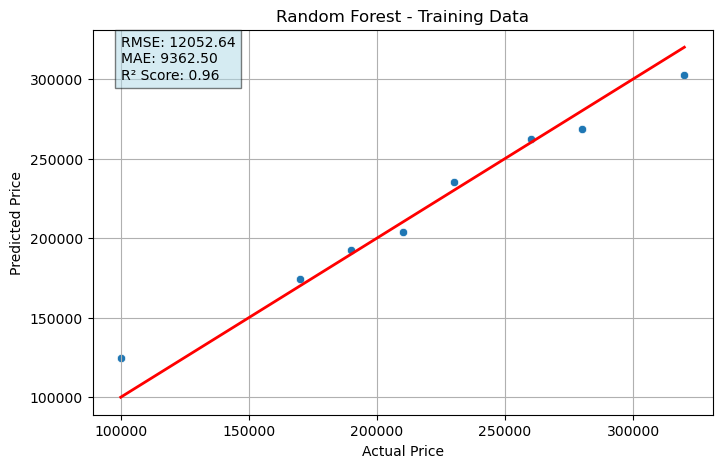

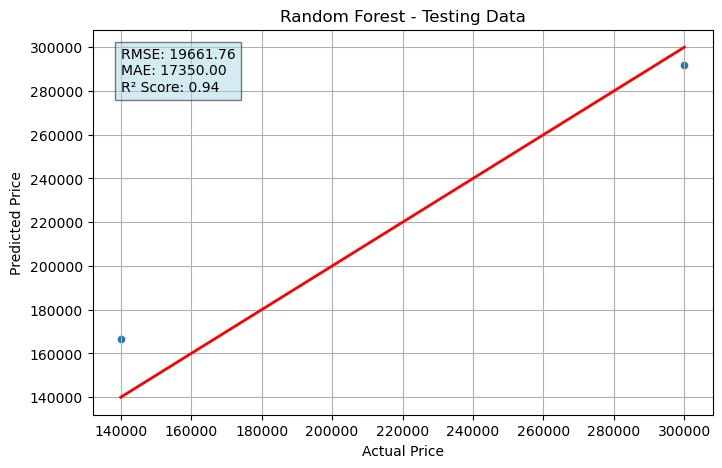

In [23]:
def plot_predictions(y_true, y_pred, title):
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(title)
    
    plt.text(x=y_true.min(), y=y_true.max() - 20000,
             s=f"RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR² Score: {r2:.2f}",
             bbox=dict(facecolor='lightblue', alpha=0.5),
             fontsize=10)
    plt.grid(True)
    plt.show()

# Plot for Random Forest
plot_predictions(y_train, y_pred_rf_train, "Random Forest - Training Data")
plot_predictions(y_test, y_pred_rf_test, "Random Forest - Testing Data")
